In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/coopnocum.csv')
df['EventDate'] = pd.to_datetime(df['EventDate'])
df

,EventDate,PartnerCountry,CooperationImpact,UncooperationImpact,CooperationIndex
0,2000-01-01,AUS,14.0,0.0,1.000000
1,2000-01-01,DEU,35.0,0.0,1.000000
2,2000-01-01,FRA,3.5,0.0,1.000000
3,2000-01-01,GBR,0.0,0.0,NaN
4,2000-01-01,JPN,74.6,0.0,1.000000
...,...,...,...,...,...
52106,2024-05-06,DEU,185.3,0.0,1.000000
52107,2024-05-06,FRA,249.5,9.5,0.926641
52108,2024-05-06,GBR,265.7,4.0,0.970337
52109,2024-05-06,JPN,295.2,0.0,1.000000


In [3]:

# Pivot the data to have one row per date and columns for each country's impacts
pivot_df = df.pivot_table(
    index='EventDate',
    columns='PartnerCountry',
    values=['CooperationImpact', 'UncooperationImpact'],
    aggfunc='sum'
)

# Flatten the multi-level column names
pivot_df.columns = [f"{country}_{impact}" for impact, country in pivot_df.columns]

# Reset the index to have EventDate as the first column
pivot_df.reset_index(inplace=True)

# Check the new structure
print(pivot_df.head())

pivot_df.to_excel('/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/coopnocumulativetest.xlsx')

   EventDate  AUS_CooperationImpact  DEU_CooperationImpact  \
0 2000-01-01                   14.0                   35.0   
1 2000-01-02                    NaN                    NaN   
2 2000-01-03                    9.4                    NaN   
3 2000-01-04                    4.7                    4.7   
4 2000-01-05                    8.0                    6.4   

   FRA_CooperationImpact  GBR_CooperationImpact  JPN_CooperationImpact  \
0                    3.5                    0.0                   74.6   
1                    NaN                   32.0                   16.0   
2                    6.6                    9.4                   12.9   
3                    0.0                   14.1                    9.4   
4                    0.0                    0.0                   29.8   

   MEX_CooperationImpact  AUS_UncooperationImpact  DEU_UncooperationImpact  \
0                   46.1                      0.0                      0.0   
1                    0.0  

In [4]:
impact_columns = [col for col in pivot_df.columns if '_' in col]
countries = sorted(set(col.split('_')[0] for col in impact_columns))

# Create new net columns for each country
for country in countries:
    coop_col = f"{country}_CooperationImpact"
    uncoop_col = f"{country}_UncooperationImpact"
    net_col = f"{country} Net"
    
    if coop_col in pivot_df.columns and uncoop_col in pivot_df.columns:
        pivot_df[net_col] = pivot_df[coop_col] - pivot_df[uncoop_col]


In [5]:
pivot_df

,EventDate,AUS_CooperationImpact,DEU_CooperationImpact,FRA_CooperationImpact,GBR_CooperationImpact,JPN_CooperationImpact,MEX_CooperationImpact,AUS_UncooperationImpact,DEU_UncooperationImpact,FRA_UncooperationImpact,GBR_UncooperationImpact,JPN_UncooperationImpact,MEX_UncooperationImpact,AUS Net,DEU Net,FRA Net,GBR Net,JPN Net,MEX Net
0,2000-01-01,14.0,35.0,3.5,0.0,74.6,46.1,0.0,0.0,0.0,0.0,0.0,0.0,14.0,35.0,3.5,0.0,74.6,46.1
1,2000-01-02,NaN,NaN,NaN,32.0,16.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,32.0,16.0,0.0
2,2000-01-03,9.4,NaN,6.6,9.4,12.9,0.0,0.0,NaN,0.0,0.0,0.0,0.0,9.4,NaN,6.6,9.4,12.9,0.0
3,2000-01-04,4.7,4.7,0.0,14.1,9.4,NaN,0.0,0.0,0.0,0.0,0.0,NaN,4.7,4.7,0.0,14.1,9.4,NaN
4,2000-01-05,8.0,6.4,0.0,0.0,29.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.4,0.0,0.0,29.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,2024-05-02,316.1,177.9,266.5,618.3,253.7,228.8,14.0,4.0,20.0,25.0,20.0,10.0,302.1,173.9,246.5,593.3,233.7,218.8
8889,2024-05-03,419.2,218.7,238.7,619.9,669.0,273.3,8.0,43.0,29.0,37.0,4.0,15.0,411.2,175.7,209.7,582.9,665.0,258.3
8890,2024-05-04,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
8891,2024-05-05,174.6,67.6,176.5,391.6,121.9,139.8,0.0,0.0,17.0,0.0,0.0,0.0,174.6,67.6,159.5,391.6,121.9,139.8


In [6]:
pivot_df.set_index('EventDate', inplace=True)
net_columns = [col for col in pivot_df.columns if col.endswith('Net')]

# Resample to monthly frequency and calculate the mean for each country
coopmonth = pivot_df[net_columns].resample('M').mean()

# Reset the index to have 'EventDate' as a column
coopmonth.reset_index(inplace=True)

# Rename the index column to 'EventDate' for clarity
coopmonth.rename(columns={'EventDate': 'Month'}, inplace=True)

<Axes: >

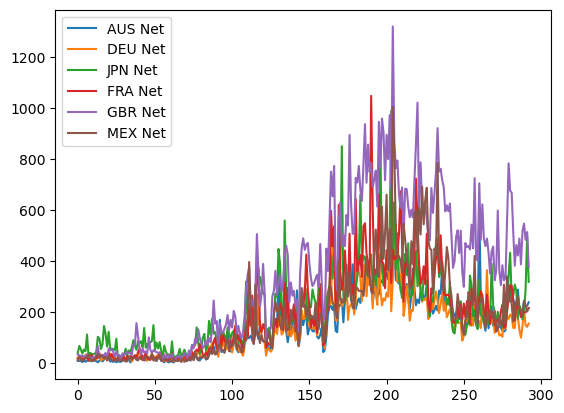

In [7]:
coopmonth[['AUS Net', 'DEU Net', 'JPN Net', 'FRA Net', 'GBR Net', 'MEX Net']].plot()

In [8]:
coopmonth.to_excel('/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/coopmonth.xlsx')

/Users/joelthomas/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joelthomas/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


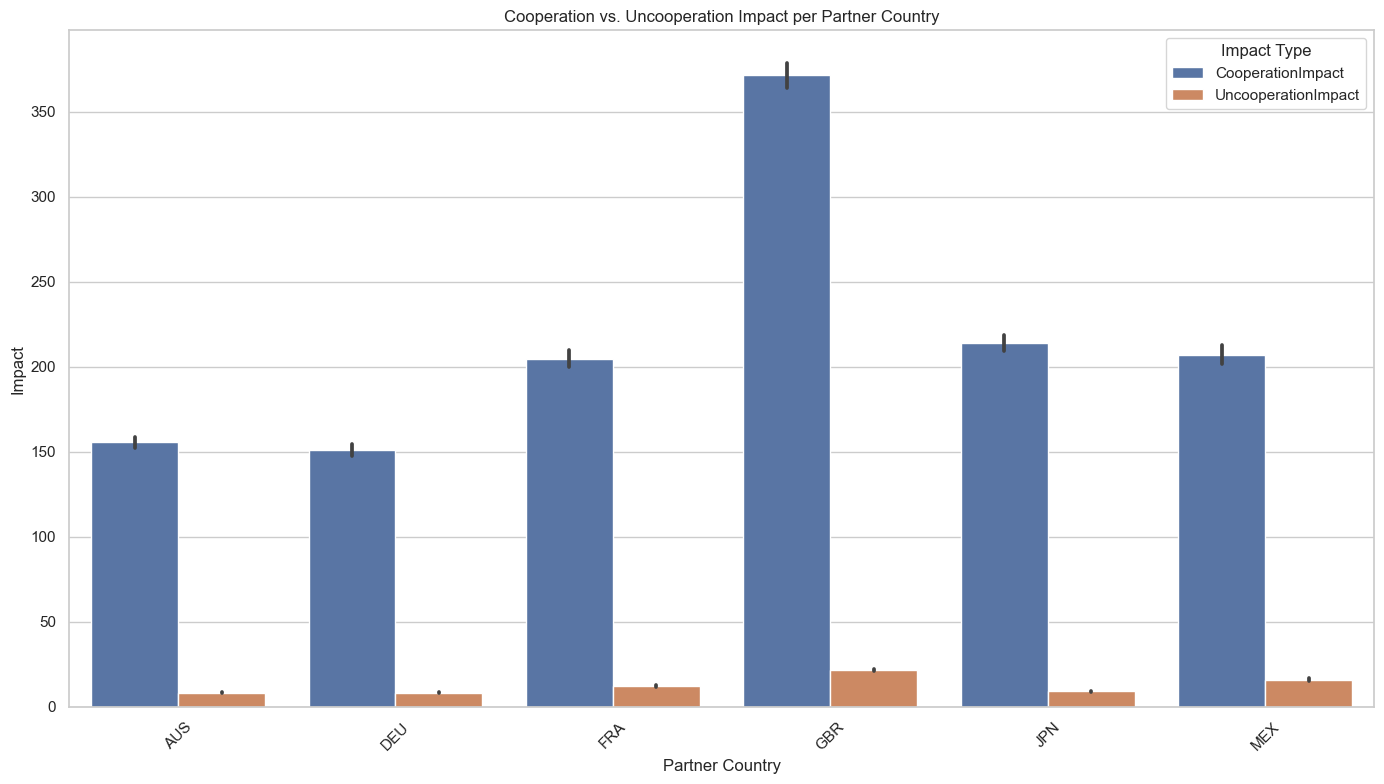

In [9]:
df = pd.read_csv('/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/coopnocum.csv')
df['EventDate'] = pd.to_datetime(df['EventDate'])
df['coop'] = df['CooperationImpact'] - df['UncooperationImpact']
df['coopratio'] = np.log((df['CooperationImpact'] - df['UncooperationImpact']))
#data['coopratio'] = data['coopratio'].rolling(window=200).mean()
#data = data.groupby('PartnerCountry')['coopratio'].resample('M').mean()

# Plot CooperationImpact and UncooperationImpact grouped by PartnerCountry
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Use seaborn to plot grouped bar graphs
plot_data = pd.melt(df, id_vars=["PartnerCountry"], value_vars=["CooperationImpact", "UncooperationImpact"], var_name="ImpactType", value_name="Impact")

# Create a bar plot grouped by PartnerCountry and ImpactType
sns.barplot(x="PartnerCountry", y="Impact", hue="ImpactType", data=plot_data)

# Label and show the plot
plt.xlabel("Partner Country")
plt.ylabel("Impact")
plt.title("Cooperation vs. Uncooperation Impact per Partner Country")
plt.legend(title="Impact Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/joelthomas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joelthomas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


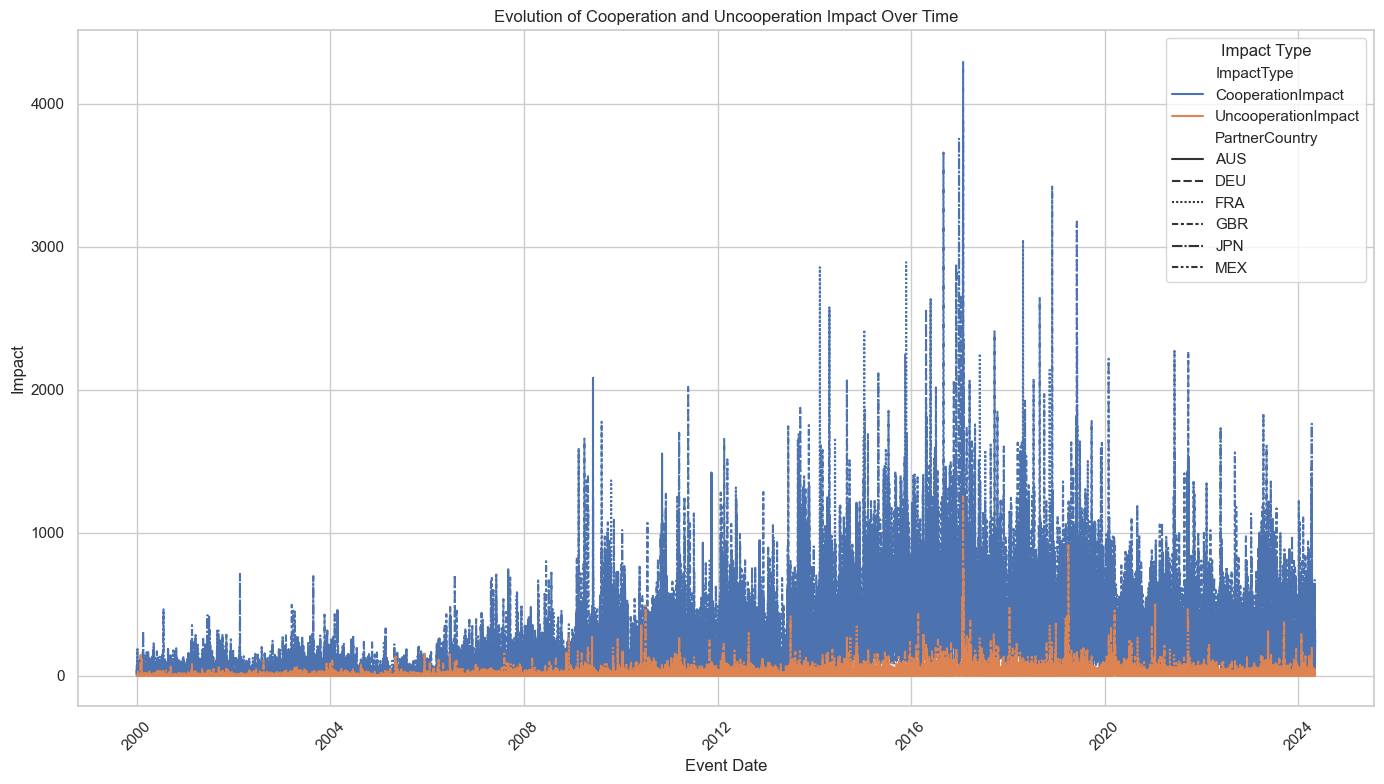

In [10]:
sns.set_theme(style="whitegrid")

# Initialize a figure
plt.figure(figsize=(14, 8))

# Melt the DataFrame for easy plotting
df_melted = pd.melt(df, id_vars=["EventDate", "PartnerCountry"], value_vars=["CooperationImpact", "UncooperationImpact"], var_name="ImpactType", value_name="Impact")

# Plot the time series for CooperationImpact and UncooperationImpact
sns.lineplot(x="EventDate", y="Impact", hue="ImpactType", style="PartnerCountry", data=df_melted)

# Add labels and show the plot
plt.xlabel("Event Date")
plt.ylabel("Impact")
plt.title("Evolution of Cooperation and Uncooperation Impact Over Time")
plt.legend(title="Impact Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/joelthomas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joelthomas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


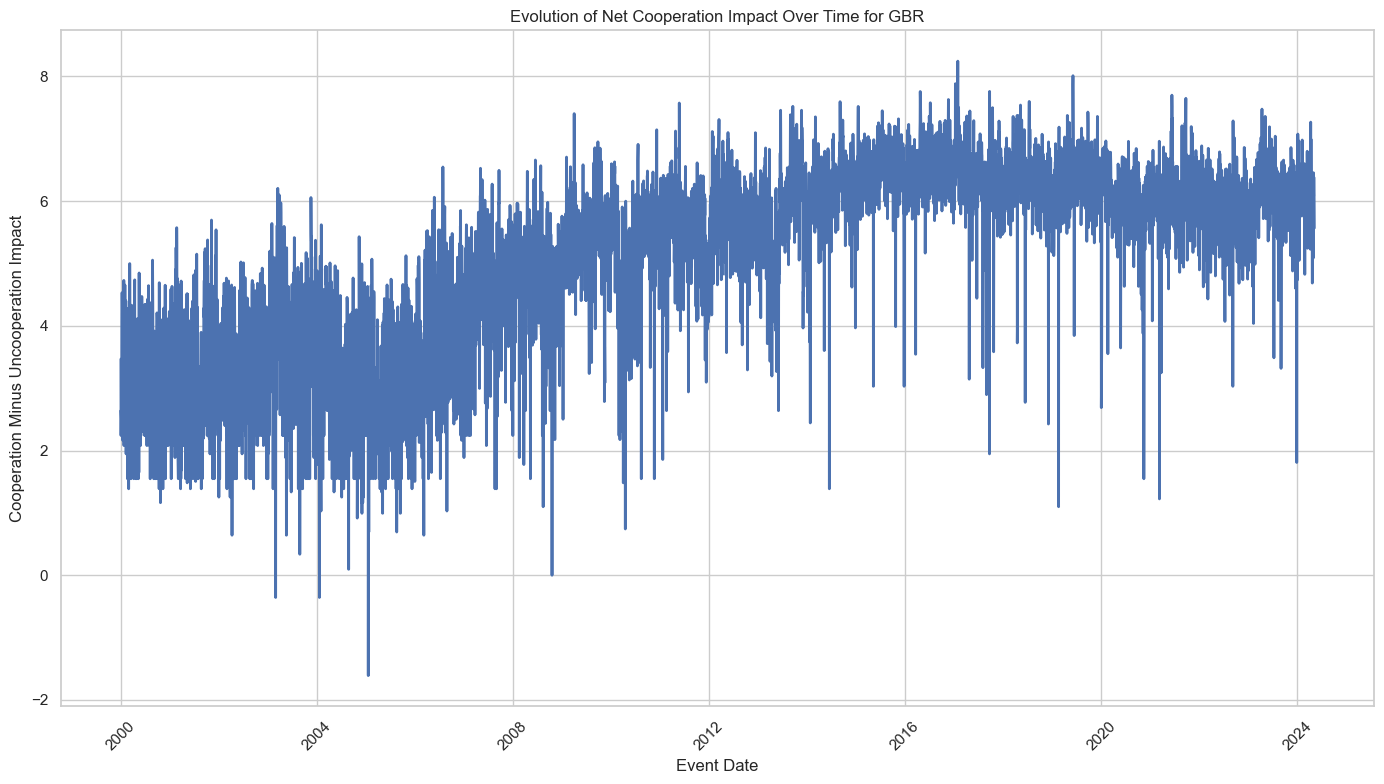

In [11]:
df_gbr = df[df['PartnerCountry'] == 'GBR']

# Set up the seaborn style
sns.set_theme(style="whitegrid")

# Initialize a figure for the plot
plt.figure(figsize=(14, 8))

# Plot the coop values over time for GBR
sns.lineplot(x='EventDate', y='coopratio', data=df_gbr, linewidth=2)

# Add labels and show the plot
plt.xlabel("Event Date")
plt.ylabel("Cooperation Minus Uncooperation Impact")
plt.title("Evolution of Net Cooperation Impact Over Time for GBR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/joelthomas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joelthomas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


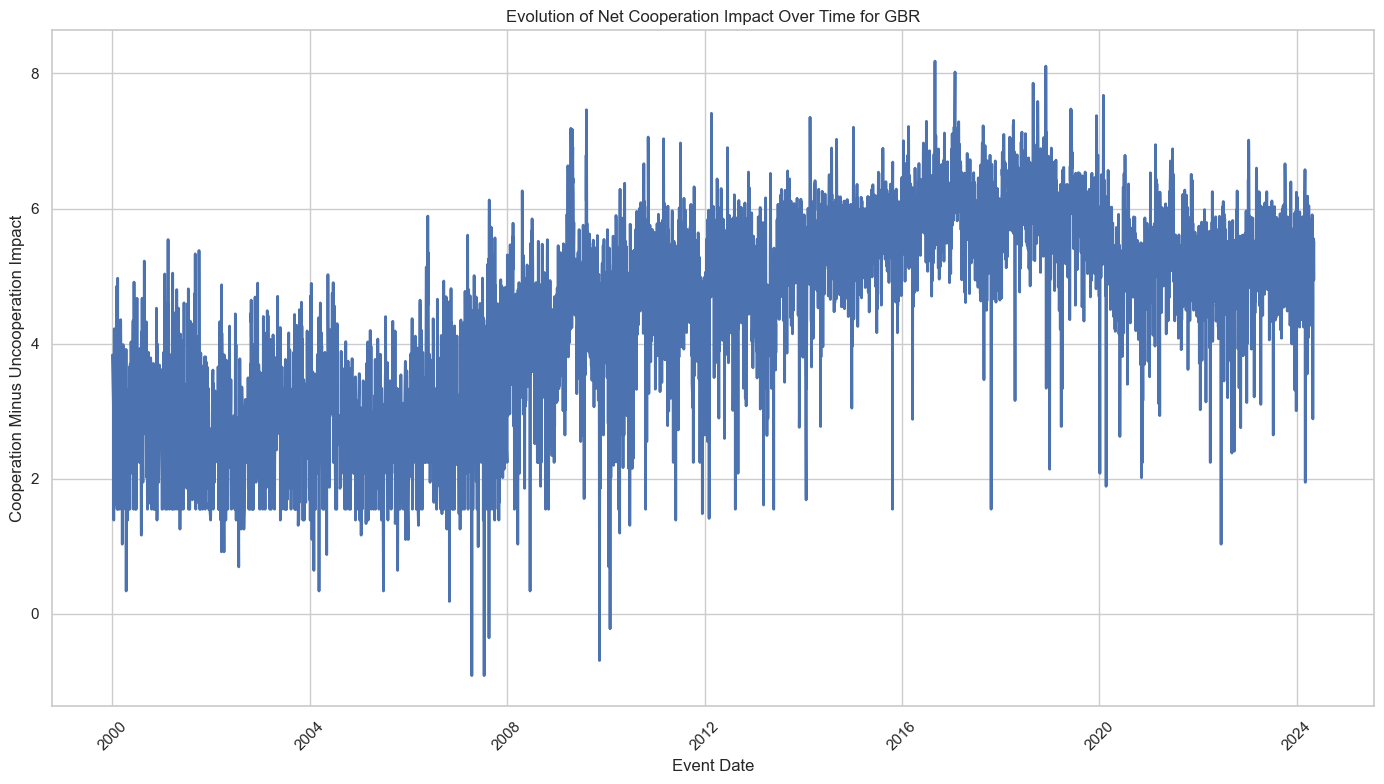

In [12]:
df_mex = df[df['PartnerCountry'] == 'MEX']

# Set up the seaborn style
sns.set_theme(style="whitegrid")

# Initialize a figure for the plot
plt.figure(figsize=(14, 8))

# Plot the coop values over time for GBR
sns.lineplot(x='EventDate', y='coopratio', data=df_mex, linewidth=2)

# Add labels and show the plot
plt.xlabel("Event Date")
plt.ylabel("Cooperation Minus Uncooperation Impact")
plt.title("Evolution of Net Cooperation Impact Over Time for GBR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
df_mex.describe()

,EventDate,CooperationImpact,UncooperationImpact,CooperationIndex,coop,coopratio
count,8567,8567.000000,8567.000000,7735.000000,8567.000000,8428.000000
mean,2012-07-02 23:27:23.469125376,207.166208,15.936909,0.857617,191.229298,-inf
min,2000-01-01 00:00:00,0.000000,0.000000,-1.000000,-274.500000,-inf
25%,2006-09-16 12:00:00,28.000000,0.000000,0.821077,24.750000,3.332205
50%,2012-08-10 00:00:00,140.700000,5.000000,0.940535,128.300000,4.886583
75%,2018-06-23 12:00:00,296.750000,20.000000,1.000000,277.050000,5.633360
max,2024-05-06 00:00:00,4299.200000,1253.000000,1.000000,3579.400000,8.182950
std,NaN,251.672361,38.554950,0.264507,232.534507,NaN


In [14]:
data = pd.read_csv('/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/coopnocum.csv')
data['EventDate'] = pd.to_datetime(data['EventDate'])
data.set_index('EventDate', inplace=True)


In [15]:
data['coop'] = data['CooperationImpact'] - data['UncooperationImpact']
data['CoopIndex'] = data['coop'].rolling(window=200).mean()
data_monthly = data.groupby('PartnerCountry')['CoopIndex'].resample('M').mean()
data_monthly = data_monthly.reset_index()
excel_file_path = '/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/CoopIndex_Monthly.xlsx'
data_monthly.to_excel(excel_file_path, index=False)

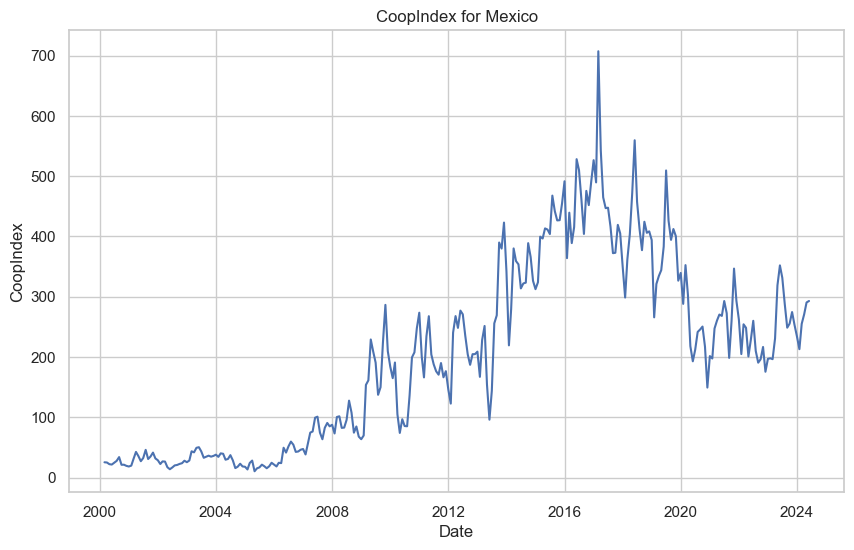

In [16]:
MEX_data = data_monthly[data_monthly['PartnerCountry'] == 'MEX']
GBR_data = data_monthly[data_monthly['PartnerCountry'] == 'GBR']
FRA_data = data_monthly[data_monthly['PartnerCountry'] == 'FRA']
DEU_data = data_monthly[data_monthly['PartnerCountry'] == 'DEU']
JPN_data = data_monthly[data_monthly['PartnerCountry'] == 'JPN']
AUS_data = data_monthly[data_monthly['PartnerCountry'] == 'AUS']

plt.figure(figsize=(10, 6))
plt.plot(MEX_data['EventDate'], MEX_data['CoopIndex'])
plt.title('CoopIndex for Mexico')
plt.xlabel('Date')
plt.ylabel('CoopIndex')
plt.grid(True)
plt.show()

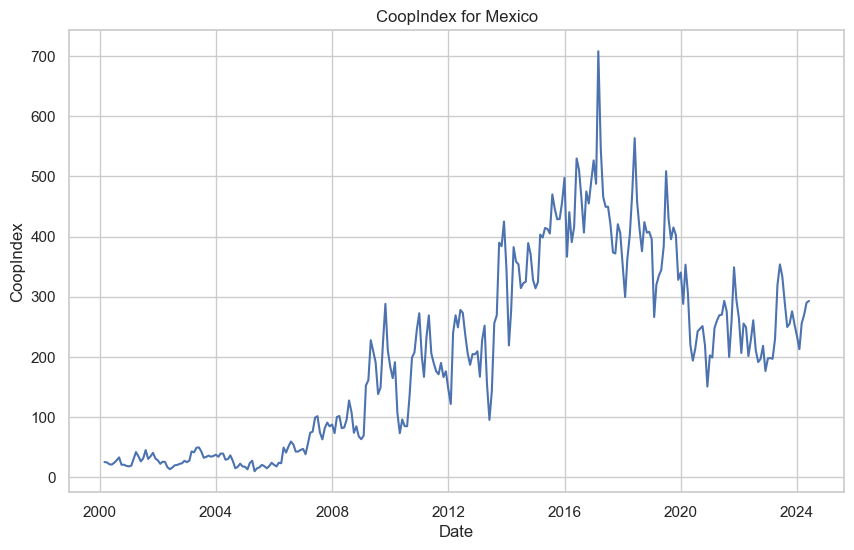

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(GBR_data['EventDate'], GBR_data['CoopIndex'])
plt.title('CoopIndex for Mexico')
plt.xlabel('Date')
plt.ylabel('CoopIndex')
plt.grid(True)
plt.show()

In [18]:
base_path = '/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/'

# Save each DataFrame to an Excel file
MEX_data.to_excel(base_path + 'MEX_coop.xlsx', index=False)
GBR_data.to_excel(base_path + 'UK_coop.xlsx', index=False)
FRA_data.to_excel(base_path + 'FRA_coop.xlsx', index=False)
DEU_data.to_excel(base_path + 'DEU_coop.xlsx', index=False)
JPN_data.to_excel(base_path + 'JPN_coop.xlsx', index=False)
AUS_data.to_excel(base_path + 'AUS_coop.xlsx', index=False)

## COOp Final

In [20]:
df = pd.read_csv('/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/coopnocum2.csv')
df['EventDate'] = pd.to_datetime(df['EventDate'])
df

,EventDate,PartnerCountry,CooperationImpact,UncooperationImpact,CooperationIndex
0,2000-01-01,AUS,14.0,0.0,1.000000
1,2000-01-01,DEU,35.0,0.0,1.000000
2,2000-01-01,FRA,5.5,0.0,1.000000
3,2000-01-01,GBR,0.0,4.0,-1.000000
4,2000-01-01,JPN,82.6,4.0,0.907621
...,...,...,...,...,...
52112,2024-05-07,DEU,347.1,32.0,0.831179
52113,2024-05-07,FRA,239.4,57.0,0.615385
52114,2024-05-07,GBR,634.4,238.0,0.454379
52115,2024-05-07,JPN,366.4,42.0,0.794319


In [21]:

# Pivot the data to have one row per date and columns for each country's impacts
pivot_df = df.pivot_table(
    index='EventDate',
    columns='PartnerCountry',
    values=['CooperationImpact', 'UncooperationImpact'],
    aggfunc='sum'
)

# Flatten the multi-level column names
pivot_df.columns = [f"{country}_{impact}" for impact, country in pivot_df.columns]

# Reset the index to have EventDate as the first column
pivot_df.reset_index(inplace=True)

# Check the new structure
print(pivot_df.head())

pivot_df.to_excel('/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/coopnocumulativetest2.xlsx')

   EventDate  AUS_CooperationImpact  DEU_CooperationImpact  \
0 2000-01-01                   14.0                   35.0   
1 2000-01-02                    NaN                    NaN   
2 2000-01-03                    9.4                    NaN   
3 2000-01-04                    4.7                    4.7   
4 2000-01-05                   16.0                    6.4   

   FRA_CooperationImpact  GBR_CooperationImpact  JPN_CooperationImpact  \
0                    5.5                    0.0                   82.6   
1                    NaN                   32.0                   16.0   
2                   23.4                   11.4                   12.9   
3                    2.0                   20.1                    9.4   
4                    4.0                    6.8                   39.8   

   MEX_CooperationImpact  AUS_UncooperationImpact  DEU_UncooperationImpact  \
0                   46.1                      0.0                      0.0   
1                    0.0  

In [22]:
impact_columns = [col for col in pivot_df.columns if '_' in col]
countries = sorted(set(col.split('_')[0] for col in impact_columns))

# Create new net columns for each country
for country in countries:
    coop_col = f"{country}_CooperationImpact"
    uncoop_col = f"{country}_UncooperationImpact"
    net_col = f"{country} Net"
    
    if coop_col in pivot_df.columns and uncoop_col in pivot_df.columns:
        pivot_df[net_col] = pivot_df[coop_col] - pivot_df[uncoop_col]


In [23]:
pivot_df.set_index('EventDate', inplace=True)
net_columns = [col for col in pivot_df.columns if col.endswith('Net')]

# Resample to monthly frequency and calculate the mean for each country
coopmonth2 = pivot_df[net_columns].resample('M').mean()

# Reset the index to have 'EventDate' as a column
coopmonth2.reset_index(inplace=True)

# Rename the index column to 'EventDate' for clarity
coopmonth2.rename(columns={'EventDate': 'Month'}, inplace=True)

In [24]:
coopmonth2.to_excel('/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/coopmonth2.xlsx')